In [1]:
from geometricalgebra.tests.test_coherent_point_drift import get_test_data
from geometricalgebra.coherent_point_drift import pose_and_correspondence_registration
import matplotlib.pyplot as plt

In [2]:
p, q = get_test_data()
a, prob, variance = pose_and_correspondence_registration(p, q, only_2d=True)

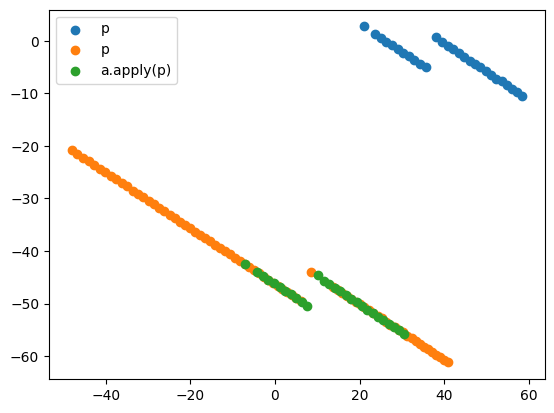

In [3]:
plt.scatter(*p.to_euclid().T, label='p')
plt.scatter(*q.to_euclid().T, label='p')
plt.scatter(*a.apply(p).to_euclid().T, label='a.apply(p)')
_ = plt.legend()

Text(0, 0.5, 'i')

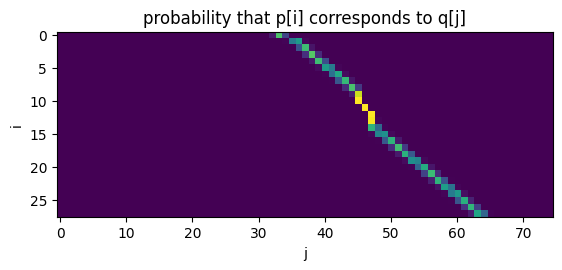

In [4]:
plt.imshow(prob)
plt.title('probability that p[i] corresponds to q[j]')
plt.xlabel('j')
plt.ylabel('i')